# EDA

This notebook imports the data and explores the current format including visualizing the data.  

In [67]:
# imports 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
import re

In [2]:
import os 
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src import helpers as h

In [3]:
parent_dir = '../../'

In [4]:
df = pd.read_csv(parent_dir + 'data/weather_madrid_LEMD_1997_2015.csv', parse_dates = ['CET'])

In [5]:
df.head()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,10.0,9.0,4.0,13,6,NaN,0.0,6.0,NaN,229
1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,10.0,9.0,4.0,26,8,47.0,0.0,5.0,Rain,143
2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,10.0,10.0,7.0,27,19,NaN,0.0,6.0,Rain-Snow,256
3,1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,10.0,10.0,10.0,27,19,40.0,0.0,2.0,NaN,284
4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,10.0,5.0,1.0,14,6,NaN,0.0,7.0,Snow,2


Check data types, number of entries, nulls etc:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   CET                          6812 non-null   datetime64[ns]
 1   Max TemperatureC             6810 non-null   float64       
 2   Mean TemperatureC            6809 non-null   float64       
 3   Min TemperatureC             6810 non-null   float64       
 4   Dew PointC                   6810 non-null   float64       
 5   MeanDew PointC               6810 non-null   float64       
 6   Min DewpointC                6810 non-null   float64       
 7   Max Humidity                 6810 non-null   float64       
 8    Mean Humidity               6810 non-null   float64       
 9    Min Humidity                6810 non-null   float64       
 10   Max Sea Level PressurehPa   6812 non-null   int64         
 11   Mean Sea Level PressurehPa  6812 non-null 

All datatypes make sense so I don't think we need to make any adjustments right now.  

It looks like some of our column headers have preceding spaces which will get annoying.  There's also variability in how the column headers are named so I'm going to get all the column names in a more useable, pythonic form (all lowercase and underscores instead of spaces and no camel case):

In [7]:
df.columns = list(map(lambda x: h.make_pythonic(x), df.columns))

In [8]:
df.columns

Index(['cet', 'max_temperature_c', 'mean_temperature_c', 'min_temperature_c',
       'dew_point_c', 'mean_dew_point_c', 'min_dewpoint_c', 'max_humidity',
       'mean_humidity', 'min_humidity', 'max_sea_level_pressureh_pa',
       'mean_sea_level_pressureh_pa', 'min_sea_level_pressureh_pa',
       'max_visibility_km', 'mean_visibility_km', 'min_visibilityk_m',
       'max_wind_speed_km/h', 'mean_wind_speed_km/h', 'max_gust_speed_km/h',
       'precipitationmm', 'cloud_cover', 'events', 'wind_dir_degrees'],
      dtype='object')

Let me just manually change the date column and that one.........

In [9]:
df.rename(columns = {'min_visibilityk_m': 'min_visibility_km', 'cet': 'date'}, inplace = True);

In [10]:
df.columns

Index(['date', 'max_temperature_c', 'mean_temperature_c', 'min_temperature_c',
       'dew_point_c', 'mean_dew_point_c', 'min_dewpoint_c', 'max_humidity',
       'mean_humidity', 'min_humidity', 'max_sea_level_pressureh_pa',
       'mean_sea_level_pressureh_pa', 'min_sea_level_pressureh_pa',
       'max_visibility_km', 'mean_visibility_km', 'min_visibility_km',
       'max_wind_speed_km/h', 'mean_wind_speed_km/h', 'max_gust_speed_km/h',
       'precipitationmm', 'cloud_cover', 'events', 'wind_dir_degrees'],
      dtype='object')

Now, let's preview data again:

In [28]:
df.head()

,date,max_temperature_c,mean_temperature_c,min_temperature_c,dew_point_c,mean_dew_point_c,min_dewpoint_c,max_humidity,mean_humidity,min_humidity,...,max_visibility_km,mean_visibility_km,min_visibility_km,max_wind_speed_km/h,mean_wind_speed_km/h,max_gust_speed_km/h,precipitationmm,cloud_cover,events,wind_dir_degrees
0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,10.0,9.0,4.0,13,6,NaN,0.0,6.0,NaN,229
1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,10.0,9.0,4.0,26,8,47.0,0.0,5.0,Rain,143
2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,10.0,10.0,7.0,27,19,NaN,0.0,6.0,Rain-Snow,256
3,1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,10.0,10.0,10.0,27,19,40.0,0.0,2.0,NaN,284
4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,10.0,5.0,1.0,14,6,NaN,0.0,7.0,Snow,2


**Let's see where most of the nan's are:**

In [16]:
df.isna().sum()

date                              0
max_temperature_c                 2
mean_temperature_c                3
min_temperature_c                 2
dew_point_c                       2
mean_dew_point_c                  2
min_dewpoint_c                    2
max_humidity                      2
mean_humidity                     2
min_humidity                      2
max_sea_level_pressureh_pa        0
mean_sea_level_pressureh_pa       0
min_sea_level_pressureh_pa        0
max_visibility_km               940
mean_visibility_km              940
min_visibility_km               940
max_wind_speed_km/h               0
mean_wind_speed_km/h              0
max_gust_speed_km/h            3306
precipitationmm                   0
cloud_cover                    1372
events                         5014
wind_dir_degrees                  0
dtype: int64

So out of 6812 entries, 5014 have missing events.  What are events:

In [25]:
df['events'].unique()

array([nan, 'Rain', 'Rain-Snow', 'Snow', 'Fog', 'Fog-Rain',
       'Rain-Thunderstorm', 'Thunderstorm', 'Rain-Hail-Thunderstorm',
       'Fog-Thunderstorm', 'Tornado', 'Fog-Rain-Thunderstorm',
       'Fog-Rain-Snow', 'Fog-Snow', 'Rain-Snow-Thunderstorm', 'Rain-Hail'],
      dtype=object)

So perhaps 'nan's just signify a 'normal' weather day - i.e. 'no event'.  Makes sense. 

**Check duplicates:**

In [24]:
df.duplicated().sum()

0

**Summary Stats:**

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
max_temperature_c,6810.0,21.039648,8.867187,0.0,13.0,20.0,29.00,41.0
mean_temperature_c,6809.0,14.658687,7.580461,-3.0,8.0,14.0,21.00,32.0
min_temperature_c,6810.0,8.640529,6.837626,-10.0,3.0,9.0,14.00,28.0
dew_point_c,6810.0,8.120705,4.741067,-12.0,5.0,8.0,12.00,20.0
mean_dew_point_c,6810.0,4.976211,4.654270,-15.0,2.0,6.0,8.00,16.0
min_dewpoint_c,6810.0,1.451248,4.909705,-22.0,-2.0,2.0,5.00,14.0
max_humidity,6810.0,81.139354,17.531839,16.0,68.0,87.0,94.00,100.0
mean_humidity,6810.0,57.971366,19.675744,15.0,41.0,59.0,74.00,100.0
min_humidity,6810.0,34.729369,19.320359,4.0,19.0,32.0,47.75,100.0
max_sea_level_pressureh_pa,6812.0,1020.529360,6.235941,994.0,1017.0,1020.0,1024.00,1047.0


**Unique Values**
Check unique values for each feature to detect any potential outliers or wrong values:

In [30]:
for col in df.columns:
    print(f'Unique vals for {col}:  {df[col].unique()}')

Unique vals for date:  ['1997-01-01T00:00:00.000000000' '1997-01-02T00:00:00.000000000'
 '1997-01-03T00:00:00.000000000' ... '2015-12-29T00:00:00.000000000'
 '2015-12-30T00:00:00.000000000' '2015-12-31T00:00:00.000000000']
Unique vals for max_temperature_c:  [ 7.  5.  2.  8. 12. 13. 16. 17. 15. 11.  6.  9. 10. 14. 18. 19. 20. 22.
 21. 23. 26. 25. 24. 27. 29. 31. 28. 30. 33. 34. 35. 37. 36. 38. 39. 32.
  4. nan  3.  1.  0. 40. 41.]
Unique vals for mean_temperature_c:  [ 4.  3.  0. 10.  8.  9.  6.  7. 11. 12. 13. 14. 16. 17. 18. 15. 19. 20.
 21. 22. 23. 24. 28. 27. 26. 29. 32. 25.  2.  5.  1. nan -2. -1. -3. 30.
 31.]
Unique vals for min_temperature_c:  [  2.   0.  -1.   1.  -2.   8.   3.   5.   4.   6.   9.   7.  10.  12.
  11.  15.  14.  13.  19.  17.  16.  18.  22.  28.  20.  21.  23.  -3.
  -4.  -5.  -6.  -9.  27.  nan  -7. -10.  -8.  25.  24.  26.]
Unique vals for dew_point_c:  [  5.   6.  -2.   2.   1.   7.   8.  10.   9.   4.   3.  12.  11.  13.
  14.  15.  17.  16.  18.  19.  -1.

All values look reasonable and nothing stands out as unusual at this stage. 

#### Isolate Relevant Dates:

The group has agreed to work only with records after 01-02-2014.  Let's subset our data:

In [33]:
df_sub = df[df['date'] >= '2004-02-01']

In [34]:
df_sub

,date,max_temperature_c,mean_temperature_c,min_temperature_c,dew_point_c,mean_dew_point_c,min_dewpoint_c,max_humidity,mean_humidity,min_humidity,...,max_visibility_km,mean_visibility_km,min_visibility_km,max_wind_speed_km/h,mean_wind_speed_km/h,max_gust_speed_km/h,precipitationmm,cloud_cover,events,wind_dir_degrees
2460,2004-02-01,12.0,9.0,7.0,9.0,8.0,6.0,100.0,92.0,82.0,...,10.0,5.0,0.0,11,6,NaN,0.00,7.0,Fog,347
2461,2004-02-02,15.0,11.0,7.0,9.0,7.0,6.0,93.0,85.0,63.0,...,10.0,10.0,8.0,10,5,NaN,0.00,5.0,NaN,353
2462,2004-02-03,17.0,10.0,3.0,8.0,5.0,2.0,100.0,79.0,48.0,...,10.0,9.0,8.0,10,3,NaN,0.00,0.0,Fog,351
2463,2004-02-04,19.0,11.0,3.0,8.0,6.0,2.0,100.0,78.0,46.0,...,9.0,9.0,9.0,10,3,23.0,0.00,0.0,NaN,359
2464,2004-02-05,19.0,11.0,3.0,8.0,5.0,2.0,100.0,76.0,40.0,...,10.0,9.0,9.0,6,3,NaN,0.00,0.0,NaN,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,2015-12-27,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,30.0,...,31.0,14.0,5.0,14,6,NaN,0.00,8.0,Fog,38
6808,2015-12-28,15.0,8.0,2.0,8.0,4.0,1.0,100.0,78.0,34.0,...,31.0,14.0,8.0,27,8,45.0,0.51,7.0,Rain,243
6809,2015-12-29,11.0,8.0,5.0,9.0,7.0,5.0,100.0,89.0,66.0,...,31.0,9.0,0.0,14,8,32.0,2.03,5.0,Fog-Rain,190
6810,2015-12-30,9.0,8.0,6.0,7.0,6.0,5.0,93.0,87.0,70.0,...,19.0,10.0,6.0,14,5,34.0,0.00,6.0,NaN,256


In [38]:
print(f'We dropped {df.shape[0] - df_sub.shape[0]} entries')

We dropped 2460 entries


Let's set the date as the index:

In [43]:
df_sub.set_index('date', inplace = True)

#### Visualize intial target:  Mean Temp

First, let's look at our target (`mean_temperature_c`) which respect to time:

In [48]:
mean_temp = df_sub['mean_temperature_c']
time = np.array(df_sub.index)

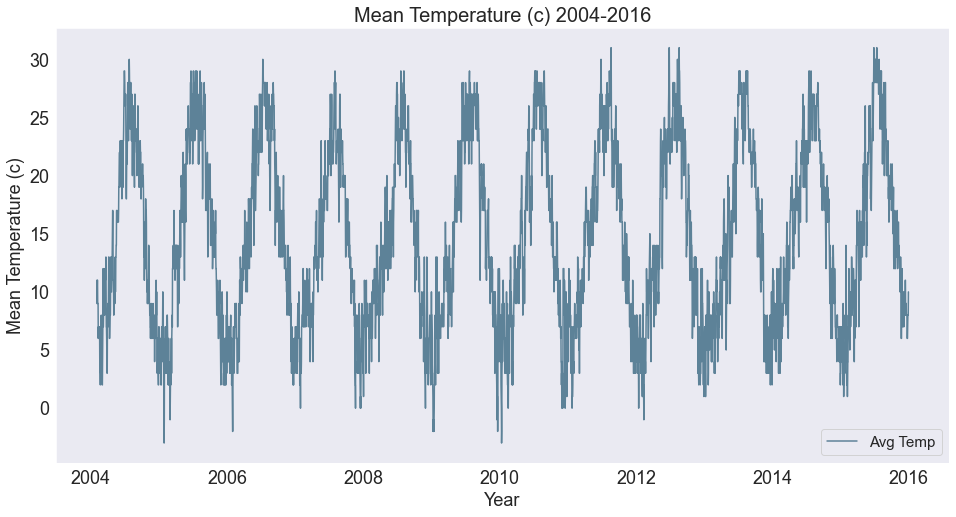

In [86]:
plt.figure(figsize = (16, 8))
plt.plot(time, mean_temp, label = 'Avg Temp', color = '#5D8298')
plt.title('Mean Temperature (c) 2004-2016', fontsize = 20)
plt.xlabel('Year', fontsize = 18), plt.ylabel('Mean Temperature (c)', fontsize = 18)
plt.yticks(fontsize = 18), plt.xticks(fontsize = 18)
plt.legend(fontsize = 15)
plt.savefig(parent_dir + 'figures/mean_temp_year.png')
plt.show();

We can see there is clear seasonality here which is to be expected, given this is temperature data which is, by nature, seasonal. 